## Currently easy trials are not removed for any plot, however all results are the same if you do remove easy trials

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from cycler import cycler
import popoff
import pop_off_functions as pof
import pop_off_plotting as pop
from Session import SessionLite
from linear_model import PoolAcrossSessions, LinearModel, MultiSessionModel
from utils.utils_funcs import d_prime
from tqdm import tqdm

/home/tplas/repos/popping-off/popoff/popoff/loadpaths.py
/home/tplas/repos/Vape


In [3]:
# from matplotlib import rcParams


# # params = {'legend.fontsize': 'xx-large',
# #          'axes.labelsize': 'xx-large',
# #          'axes.titlesize':'xx-large',
# #          'xtick.labelsize':'xx-large',
# #          'ytick.labelsize':'xx-large'}

# plt.rc("axes.spines", top=False, right=False) # despine

# COLORS = [
# '#228E5E', # Hit green
# '#DB3713', # Miss red
# ]

# ## MAKE THE FONT SIZE 20 or 21
# rcParams['font.family'] = 'sans-serif'
# rcParams['font.sans-serif'] = ['Arial']
# rcParams['font.size'] = 14


# # rcParams.update(params)


In [4]:
pas = PoolAcrossSessions(remove_targets=False, subsample_sessions=False,
                         remove_toosoon=True)

for ss in pas.sessions.values():
    _ = pop.normalise_raster_data(session=ss, sort_neurons=False, filter_150_stim=False)
    

long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
ALERT SESSIONS NOT SUBSAMPLED
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time


In [95]:
# pas.sessions
print(pas.plot_string(is_plot=False))

Hello Adam
Remove targets is False.
Remove too soon is True
Here are the sessions in play:
['Mouse J064, run 10', 'Mouse J064, run 11', 'Mouse J064, run 14', 'Mouse RL070, run 28', 'Mouse RL070, run 29', 'Mouse RL117, run 29', 'Mouse RL117, run 30', 'Mouse RL123, run 22', 'Mouse RL116, run 32', 'Mouse RL116, run 33']
pre-frames spans -1.1 to -0.1 inclusive
post-frames spans 0.83 to 6.0 inclusive


(-0.5, 2.5)

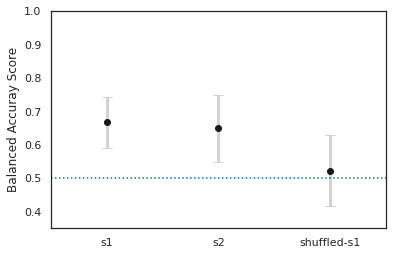

In [96]:
coefs = pas.compare_regions_all_sessions(frames = 'pre', make_plot=True)
plt.ylabel('Balanced Accuray Score')
plt.ylim(0.35, 1)
plt.xlim(-0.5, 2.5)

# save_figure('Figure4_pre-stim-allCellsDecoder_S1S2null')

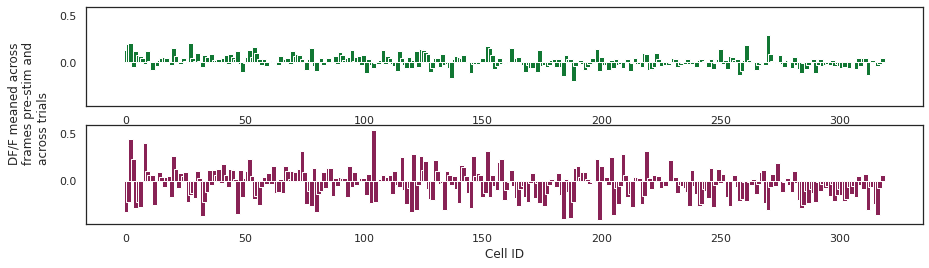

In [37]:
lm = pas.linear_models[0]
pop.firing_rate_dist(lm, region='s1', match_tnums=False, sort=False)
# save_figure('Figure4_firingRateDist')

In [5]:
reg_list = ['s1', 's2']
cov_dicts = {x: {} for x in reg_list}
super_covar_df_dict = {}
for i_reg, reg in enumerate(reg_list):
    print(reg)
    for i_lm, linear_model in tqdm(enumerate(pas.linear_models)):
        cov_dicts[reg][i_lm] = pof.get_covariates(linear_model, reg)

    super_covar_df_dict[reg] = pof.create_df_from_cov_dicts(cov_dicts=cov_dicts[reg], 
                                                  zscore_list=['variance_cell_rates'])

0it [00:00, ?it/s]

s1


10it [01:31,  9.15s/it]
0it [00:00, ?it/s]

s2


10it [01:15,  7.55s/it]


In [149]:
cov_dicts['s1'][0].keys()#['trial_number']

dict_keys(['trial_mean', 'delta_f', 'mean_pre', 'mean_post', 'corr_pre', 'corr_post', 'largest_singular_value', 'largest_PC_var', 'largest_factor_var', 'flat', 'trial_number', 'flattened_variance', 'variance_pop_mean', 'variance_cell_rates', 'mean_cell_variance', 'reward_history', 'n_cells_stimmed', 'lick', 'reward', 'jonas_metric', 'y'])

Session 0, LinregressResult(slope=-0.134329686737248, intercept=0.8161898321983342, rvalue=-0.9463676133961008, pvalue=9.325160752266997e-18, stderr=0.00798327627319934, intercept_stderr=0.002954420215858118)
Session 1, LinregressResult(slope=-0.15744472917199834, intercept=0.683877048351051, rvalue=-0.9283292914176333, pvalue=9.809648373534891e-26, stderr=0.008425457786794646, intercept_stderr=0.00378809112429333)
Session 2, LinregressResult(slope=-0.215433858544543, intercept=0.7262015827479701, rvalue=-0.9526947179005392, pvalue=1.0950713424704104e-31, stderr=0.009024397155298776, intercept_stderr=0.004723485078813737)
Session 3, LinregressResult(slope=-0.10207154460700106, intercept=0.2843478997427719, rvalue=-0.9051578846701899, pvalue=8.03521338432943e-63, stderr=0.0037430404986740352, intercept_stderr=0.0026049013957556515)
Session 4, LinregressResult(slope=-0.24637549926054314, intercept=0.6132484299043421, rvalue=-0.9701284827754688, pvalue=4.9891847032050395e-67, stderr=0.005

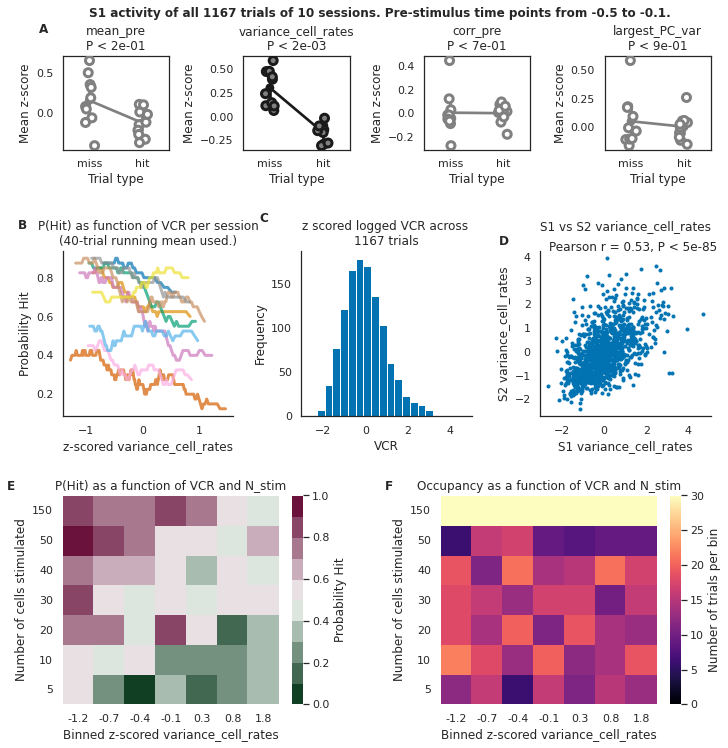

In [6]:
save_fig = False

fig = plt.figure(constrained_layout=False, figsize=(10, 10))
gs_top = fig.add_gridspec(ncols=4, nrows=1, bottom=0.82, top=0.95, right=0.95, left=0.05, 
                          hspace=0.3, wspace=0.7)
gs_middle = fig.add_gridspec(ncols=3, nrows=1, bottom=0.45, top=0.68, right=0.95, left=0.05, 
                             hspace=0.3, wspace=0.4)
gs_bottom = fig.add_gridspec(ncols=2, nrows=1, bottom=0.05, top=0.34, right=0.95, left=0.05, 
                             hspace=0.3, wspace=0.4)

cov_names = ['mean_pre', 'variance_cell_rates', 'corr_pre', 'largest_PC_var']
n_bins = 7
region = 's1'

ax_cov_scatter = {x: fig.add_subplot(gs_top[i_x]) for i_x, x in enumerate(cov_names)}
ax_vcr_lines = fig.add_subplot(gs_middle[0])
ax_vcr_hist = fig.add_subplot(gs_middle[1])
ax_vcr_s1s2 = fig.add_subplot(gs_middle[2])
ax_matrices = {i_x: fig.add_subplot(gs_bottom[i_x]) for i_x in range(2)}

pop.scatter_plots_covariates(cov_dicts=cov_dicts[region], cov_names=cov_names, 
                             ax_dict=ax_cov_scatter, lims=None, plot_type='pointplot')

pop.plot_accuracy_covar(cov_dicts=cov_dicts[region], zscore_covar=True,
                        one_sided_ws=20, ax=ax_vcr_lines, sessions=pas.sessions)

pop.hist_covar(ax=ax_vcr_hist, super_covar_df=super_covar_df_dict[region])

pop.scatter_covar_s1s2(super_covar_df_dict=super_covar_df_dict, ax=ax_vcr_s1s2)

pop.plot_density_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='fraction_hit', ax=ax_matrices[0])
pop.plot_density_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='occupancy', ax=ax_matrices[1])

assert len(pas.linear_models[0].session.filter_ps_time) == len(pas.linear_models[0].pre)
time_pre = pas.linear_models[0].session.filter_ps_time[pas.linear_models[0].pre]
str_time = f'Pre-stimulus time points from {np.round(time_pre[0], 2)} to {np.round(time_pre[-1], 2)}'
signature_time = f'{np.round(time_pre[0], 2)}_to_{np.round(time_pre[-1], 2)}'.replace('.', ',')
ax_cov_scatter[cov_names[0]].text(s=f'{region.upper()} activity of all {len(super_covar_df_dict[region])} trials of {len(pas.linear_models)} sessions. {str_time}.',
                                  x=0, y=1.2, fontdict={'weight': 'bold'});

ax_cov_scatter[cov_names[0]].text(s='A', x=-0.95, y=1, fontdict={'weight': 'bold'})
ax_vcr_lines.text(s='B', x=-2.2, y=1.05, fontdict={'weight': 'bold'})
ax_vcr_hist.text(s='C', x=-5, y=220, fontdict={'weight': 'bold'})
ax_vcr_s1s2.text(s='D', x=-5, y=4.5, fontdict={'weight': 'bold'})
ax_matrices[0].text(s='E', x=-1.8, y=7.2, fontdict={'weight': 'bold'})
ax_matrices[1].text(s='F', x=-1.8, y=7.2, fontdict={'weight': 'bold'})

if save_fig:
    plt.savefig(f'/home/tplas/repos/popping-off/figures/snr_overview/snr_overview_{region}_prestim{signature_time}_{len(super_covar_df_dict[region])}sessions.pdf',
                bbox_inches='tight')

In [113]:
# plt.plot(super_covar_df_dict['s1']['variance_cell_rates'], super_covar_df_dict['s2']['variance_cell_rates'], '.')
super_covar_df_dict['s1']['n_cells_stimmed']

0        10
1        50
2        30
3       150
4        10
       ... 
1162    150
1163    150
1164    150
1165    150
1166     30
Name: n_cells_stimmed, Length: 1167, dtype: int64

In [241]:
# pas.linear_models[0].pre

WilcoxonResult(statistic=7.0, pvalue=0.037109375)


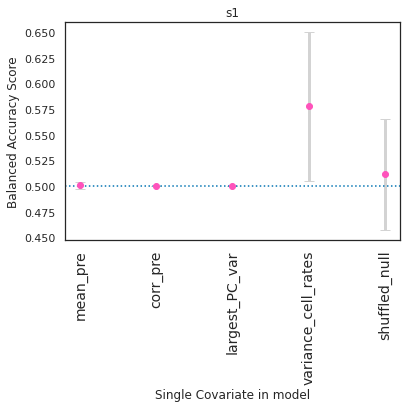

In [164]:
pas.single_covariate(region=region)
# save_figure(f'Figure4_singleCovarite_{region}')

Session 0, LinregressResult(slope=-0.134329686737248, intercept=0.8161898321983342, rvalue=-0.9463676133961008, pvalue=9.325160752266997e-18, stderr=0.00798327627319934, intercept_stderr=0.002954420215858118)
Session 1, LinregressResult(slope=-0.15744472917199834, intercept=0.683877048351051, rvalue=-0.9283292914176333, pvalue=9.809648373534891e-26, stderr=0.008425457786794646, intercept_stderr=0.00378809112429333)
Session 2, LinregressResult(slope=-0.215433858544543, intercept=0.7262015827479701, rvalue=-0.9526947179005392, pvalue=1.0950713424704104e-31, stderr=0.009024397155298776, intercept_stderr=0.004723485078813737)
Session 3, LinregressResult(slope=-0.10207154460700106, intercept=0.2843478997427719, rvalue=-0.9051578846701899, pvalue=8.03521338432943e-63, stderr=0.0037430404986740352, intercept_stderr=0.0026049013957556515)
Session 4, LinregressResult(slope=-0.24637549926054314, intercept=0.6132484299043421, rvalue=-0.9701284827754688, pvalue=4.9891847032050395e-67, stderr=0.005

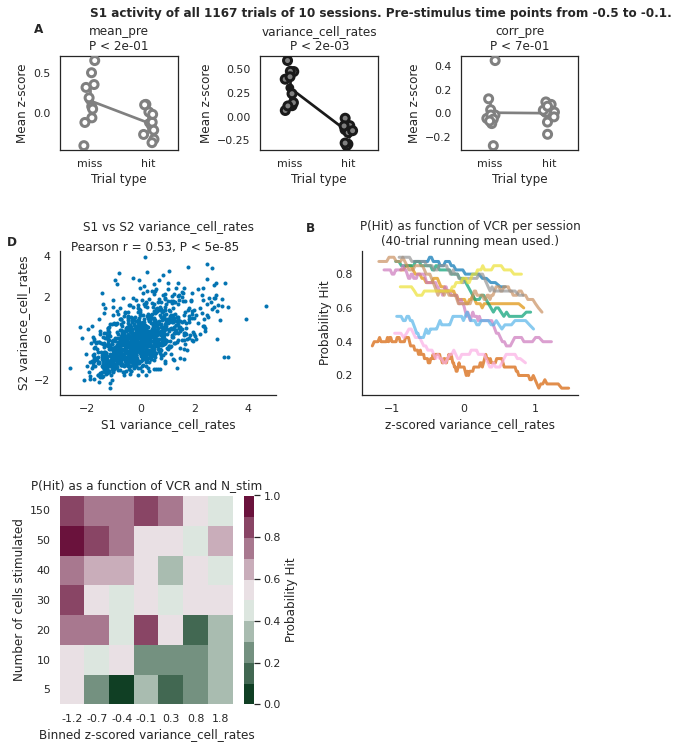

In [12]:
save_fig = False

fig = plt.figure(constrained_layout=False, figsize=(8, 10))
gs_top = fig.add_gridspec(ncols=3, nrows=1, bottom=0.82, top=0.95, right=0.95, left=0.05, 
                          hspace=0.3, wspace=0.7)
gs_middle = fig.add_gridspec(ncols=2, nrows=1, bottom=0.48, top=0.68, right=0.95, left=0.05, 
                             hspace=0.3, wspace=0.4)
gs_bottom = fig.add_gridspec(ncols=2, nrows=1, bottom=0.05, top=0.34, right=0.95, left=0.05, 
                             hspace=0.3, wspace=0.4)

cov_names = ['mean_pre', 'variance_cell_rates', 'corr_pre']
n_bins = 7
region = 's1'

ax_cov_scatter = {x: fig.add_subplot(gs_top[i_x]) for i_x, x in enumerate(cov_names)}
ax_vcr_lines = fig.add_subplot(gs_middle[1])
ax_vcr_s1s2 = fig.add_subplot(gs_middle[0])
ax_matrix = fig.add_subplot(gs_bottom[0])

pop.scatter_plots_covariates(cov_dicts=cov_dicts[region], cov_names=cov_names, 
                             ax_dict=ax_cov_scatter, lims=None, plot_type='pointplot')

pop.plot_accuracy_covar(cov_dicts=cov_dicts[region], zscore_covar=True,
                        one_sided_ws=20, ax=ax_vcr_lines, sessions=pas.sessions)

pop.scatter_covar_s1s2(super_covar_df_dict=super_covar_df_dict, ax=ax_vcr_s1s2)

pop.plot_density_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='fraction_hit', ax=ax_matrix)

assert len(pas.linear_models[0].session.filter_ps_time) == len(pas.linear_models[0].pre)
time_pre = pas.linear_models[0].session.filter_ps_time[pas.linear_models[0].pre]
str_time = f'Pre-stimulus time points from {np.round(time_pre[0], 2)} to {np.round(time_pre[-1], 2)}'
signature_time = f'{np.round(time_pre[0], 2)}_to_{np.round(time_pre[-1], 2)}'.replace('.', ',')
ax_cov_scatter[cov_names[0]].text(s=f'{region.upper()} activity of all {len(super_covar_df_dict[region])} trials of {len(pas.linear_models)} sessions. {str_time}.',
                                  x=0, y=1.2, fontdict={'weight': 'bold'});

ax_cov_scatter[cov_names[0]].text(s='A', x=-0.95, y=1, fontdict={'weight': 'bold'})
ax_vcr_lines.text(s='B', x=-2.2, y=1.05, fontdict={'weight': 'bold'})
ax_vcr_hist.text(s='C', x=-5, y=220, fontdict={'weight': 'bold'})
ax_vcr_s1s2.text(s='D', x=-5, y=4.5, fontdict={'weight': 'bold'})
ax_matrices[0].text(s='E', x=-1.8, y=7.2, fontdict={'weight': 'bold'})
ax_matrices[1].text(s='F', x=-1.8, y=7.2, fontdict={'weight': 'bold'})

if save_fig:
    plt.savefig(f'/home/tplas/repos/popping-off/full_figs_manuscript/fig_4_wo_schem.svg',
                bbox_inches='tight')

In [262]:
(mat_fraction, median_cov_perc_arr, cov_perc_arr, 
        n_stim_arr) = pof.compute_density_hit_miss_covar(super_covar_df=super_covar_df_dict['s1'], 
                                             n_bins_covar=7, metric='fraction_hit')

In [10]:
# import seaborn as sns
# sns.heatmap(mat_fraction, annot=True)

super_covar_df

NameError: name 'super_covar_df' is not defined

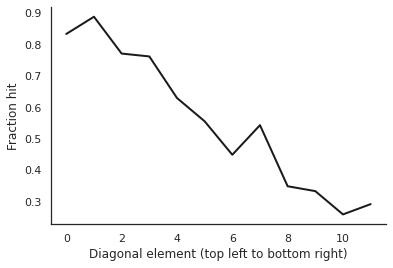

In [13]:
tmp = pop.plot_collapsed_hit_miss_covar(super_covar_df=super_covar_df_dict['s1'])
plt.save_fig('/home/tplas/')

In [293]:
type(tmp)

numpy.float64

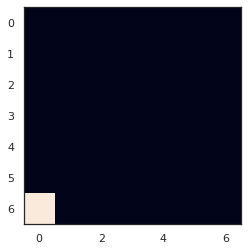

In [270]:
plt.imshow(np.eye(7, k=-6))

In [258]:
tmp = pof.log_reg_covars(covar_dict=cov_dicts, hard_balance=False, zscore_data=True)

[0.01006458 0.01879189 0.04140065 0.06698655 0.03012946 0.0477461
 0.4936975  0.1432481  0.49345267 0.38074358 0.72549063 0.97338873
 0.94762151 0.68019218 0.79358385 0.74122226 0.82073716 0.98763055
 0.98938833]
[0.0328396  0.01332293 0.02715571 0.46785343 0.42538199 0.01558802
 0.03843534 0.27437454 0.4452647  0.71950203 0.5073205  0.86583881
 0.85358535 0.7249313  0.72209751 0.98297882 0.99164436 0.53965823
 0.97143199]
[7.33428757e-02 4.64606961e-01 7.90880931e-02 5.88927591e-01
 9.62207583e-01 9.58888538e-01 9.67719146e-01 9.97277300e-01
 9.65941215e-01 9.94843823e-01 9.35606473e-01 9.94103879e-01
 9.97879327e-01 1.77585114e-04 3.35420855e-04 3.85413608e-03
 1.01406527e-02 1.35110134e-02 4.90437260e-03]
[0.98065474 0.93084504 0.99311945 0.98858925 0.99013502 0.24736258
 0.07962959 0.07535173 0.06291439 0.09083075 0.49926937 0.9981808
 0.09839491 0.96223506 0.76205325 0.00739564 0.05150091 0.00469424]
[1.81302210e-06 6.82013114e-06 7.78374565e-04 2.91891287e-04
 7.13760874e-04 3.53

[3.97908038e-01 5.48645637e-05 7.19172348e-03 2.65296041e-02
 1.89704505e-01 1.50304185e-03 9.27673585e-01 5.24269731e-01
 3.62565723e-02 6.14726295e-05 2.60563389e-02 7.86307299e-01
 1.44876585e-02 9.62035949e-01 4.83865180e-02 9.09099505e-01
 9.94114534e-01 6.86071895e-01 9.99387702e-01 9.99999997e-01
 9.98877137e-01 9.87804213e-01 9.99486856e-01 9.40290222e-01
 9.99241134e-01]
[0.00108702 0.34706896 0.07600849 0.10497983 0.05891793 0.03195156
 0.05545753 0.1012217  0.97750446 0.57486677 0.07879314 0.99978295
 0.91193297 0.0099382  0.9860242  0.64314377 0.99470727 0.93605214
 0.68723248 0.98237458 0.78420144 0.89146852 0.06216776 0.36041695
 0.92520759]
[1.43500422e-01 1.13419459e-02 8.59441946e-01 2.18156183e-01
 1.19607503e-01 6.30415603e-04 1.29722788e-01 1.38798600e-03
 1.04443239e-01 4.05336601e-01 1.88438253e-01 9.91775280e-05
 1.45024151e-03 1.10091037e-01 9.99993179e-01 8.49856695e-01
 1.76994131e-02 9.98073299e-01 5.88770102e-01 9.11462530e-01
 5.73696221e-01 9.99858496e-01 

In [257]:
tmp

({'mean_pre': array([0.50101305, 0.52369974, 0.4906572 , 0.46828804, 0.49653386,
         0.51505836, 0.50408605, 0.51068382, 0.51603762, 0.42798463]),
  'corr_pre': array([0.50303485, 0.48533532, 0.49453346, 0.48804135, 0.49800884,
         0.50006327, 0.49362755, 0.50028169, 0.49613086, 0.49846637]),
  'variance_cell_rates': array([0.48934984, 0.49373554, 0.48891505, 0.47859575, 0.48584998,
         0.49686371, 0.50191743, 0.49200899, 0.504515  , 0.48311875])},
 {'mean_pre': array([0.00331699, 0.01983118, 0.01216788, 0.07425812, 0.04739816,
         0.05356811, 0.02085771, 0.0054795 , 0.0092497 , 0.02407258]),
  'corr_pre': array([0.00113611, 0.0109977 , 0.00102851, 0.07889784, 0.04748203,
         0.04355872, 0.0167295 , 0.01589294, 0.01188146, 0.01752442]),
  'variance_cell_rates': array([0.00139388, 0.00971825, 0.01867206, 0.07736038, 0.04520782,
         0.0410061 , 0.0171047 , 0.01333491, 0.00635103, 0.02379   ])})

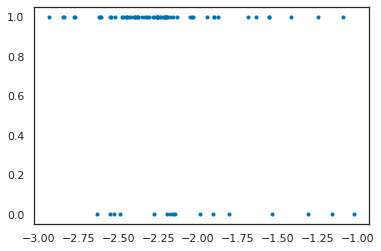

In [239]:
plt.plot(cov_dicts['s1'][0]['variance_cell_rates'],
         cov_dicts['s1'][0]['y'], '.')